# <b>1 <span style='color:#0386f7de'>|</span> Importing libraries</b>
- **For Data Manipulation**: numpy, pandas, sklearn
- **For Data Visualization**: matplotlib, seaborn, plotly

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# <b>2 <span style='color:#0386f7de'>|</span>About the Dataset</b>

In [2]:
df = pd.read_csv('/kaggle/input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


## Column Descriptions
- `HeartDisease`: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).
- `BMI`: Body Mass Index (BMI).
- `Smoking`: Have you smoked at least 100 cigarettes in your entire life?
- `AlcoholDrinking`: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- `Stroke`: (Ever told) (you had) a stroke?
- `PhysicalHealth`: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).
- `MentalHealth`: Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).
- `DiffWalking`: Do you have serious difficulty walking or climbing stairs?
- `Sex`: Are you male or female?
- `AgeCategory`: Fourteen-level age category. (then calculated the mean)
- `Race`: Imputed race/ethnicity value.
- `Diabetic`: (Ever told) (you had) diabetes?
- `PhysicalActivity`: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.
- `GenHealth`: Would you say that in general your health is...
- `SleepTime`: On average, how many hours of sleep do you get in a 24-hour period?
- `Asthma`: (Ever told) (you had) asthma?
- `KidneyDisease`: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- `SkinCancer`: (Ever told) (you had) skin cancer?

#### AgeCategory shouldn't be categorical, so I will apply a function to calculate the mean age and make it a continuous feature

In [3]:
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
df['AgeCategory'] = df['AgeCategory'].apply(lambda x: encode_AgeCategory[x])

Categorical Features:  
`HeartDisease`, `Smoking`, `AlcoholDrinking`, `Stroke`, `DiffWalking`, `Sex`, `Race`, `Diabetic`, `PhysicalActivity`, `GenHealth`, `Asthma`, `KidneyDisease`, `SkinCancer`

Continuous Features:  
`BMI`, `PhysicalHealtH`, `MentalHealth`, `AgeCategory`, `SleepTime`

## Column Statistics (of numerical data)

In [4]:
df.describe()[1:][['BMI','PhysicalHealth','MentalHealth', 'AgeCategory', 'SleepTime']].T.style.background_gradient(cmap='Blues')

,mean,std,min,25%,50%,75%,max
BMI,28.325399,6.356100,12.020000,24.030000,27.340000,31.420000,94.850000
PhysicalHealth,3.371710,7.950850,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,3.898366,7.955235,0.000000,0.000000,0.000000,3.000000,30.000000
AgeCategory,54.355759,17.720429,21.000000,42.000000,57.000000,67.000000,80.000000
SleepTime,7.097075,1.436007,1.000000,6.000000,7.000000,8.000000,24.000000


## Column Statistics (of categorical data)

In [5]:
fig = make_subplots(
    rows=7, cols=2, subplot_titles=("HeartDisease", "Smoking",
                                    "AlcoholDrinking","Stroke",
                                    "DiffWalking", "Sex",
                                    'Race', 'Diabetic',
                                    'PhysicalActivity','GenHealth',
                                    'Asthma', 'KidneyDisease',
                                    'SkinCancer'),
    specs=[[{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}]],
)

fig.add_trace(go.Pie(labels=np.array(df['HeartDisease'].value_counts().index), values=[x for x in df['HeartDisease'].value_counts()], textinfo='label+percent', rotation=-45),
              row=1, col=1)

fig.add_trace(go.Pie(labels=np.array(df['Smoking'].value_counts().index), values=[x for x in df['Smoking'].value_counts()], textinfo='label+percent'),
              row=1, col=2)

fig.add_trace(go.Pie(labels=np.array(df['AlcoholDrinking'].value_counts().index), values=[x for x in df['AlcoholDrinking'].value_counts()], textinfo='label+percent', rotation=-45),
              row=2, col=1)

fig.add_trace(go.Pie(labels=np.array(df['Stroke'].value_counts().index), values=[x for x in df['Stroke'].value_counts()], textinfo='label+percent', rotation=-45),
              row=2, col=2)

fig.add_trace(go.Pie(labels=np.array(df['DiffWalking'].value_counts().index), values=[x for x in df['DiffWalking'].value_counts()], textinfo='label+percent'),
              row=3, col=1)

fig.add_trace(go.Pie(labels=np.array(df['Sex'].value_counts().index), values=[x for x in df['Sex'].value_counts()], textinfo='label+percent'),
              row=3, col=2)

fig.add_trace(go.Pie(labels=np.array(df['Race'].value_counts().index), values=[x for x in df['Race'].value_counts()], textinfo='label+percent', rotation=-45),
              row=4, col=1)

fig.add_trace(go.Pie(labels=np.array(df['PhysicalActivity'].value_counts().index), values=[x for x in df['PhysicalActivity'].value_counts()], textinfo='label+percent'),
              row=4, col=2)

fig.add_trace(go.Pie(labels=np.array(df['Diabetic'].value_counts().index), values=[x for x in df['Diabetic'].value_counts()], textinfo='label+percent', rotation=-45),
              row=5, col=1)

fig.add_trace(go.Pie(labels=np.array(df['GenHealth'].value_counts().index), values=[x for x in df['GenHealth'].value_counts()], textinfo='label+percent'),
              row=5, col=2)

fig.add_trace(go.Pie(labels=np.array(df['Asthma'].value_counts().index), values=[x for x in df['Asthma'].value_counts()], textinfo='label+percent', rotation=-45),
              row=6, col=1)

fig.add_trace(go.Pie(labels=np.array(df['KidneyDisease'].value_counts().index), values=[x for x in df['KidneyDisease'].value_counts()], textinfo='label+percent', rotation=-45),
              row=6, col=2)

fig.add_trace(go.Pie(labels=np.array(df['SkinCancer'].value_counts().index), values=[x for x in df['SkinCancer'].value_counts()], textinfo='label+percent', rotation=-45),
              row=7, col=1)


fig.update_layout(height=3200, font=dict(size=14), showlegend=False)

fig.show()

# <b>3 <span style='color:#0386f7de'>|</span>Exploratory Analysis</b>

<h2>3.1 <span style='color:#0386f7de'>|</span>Visualization of Continuous Data</h2>

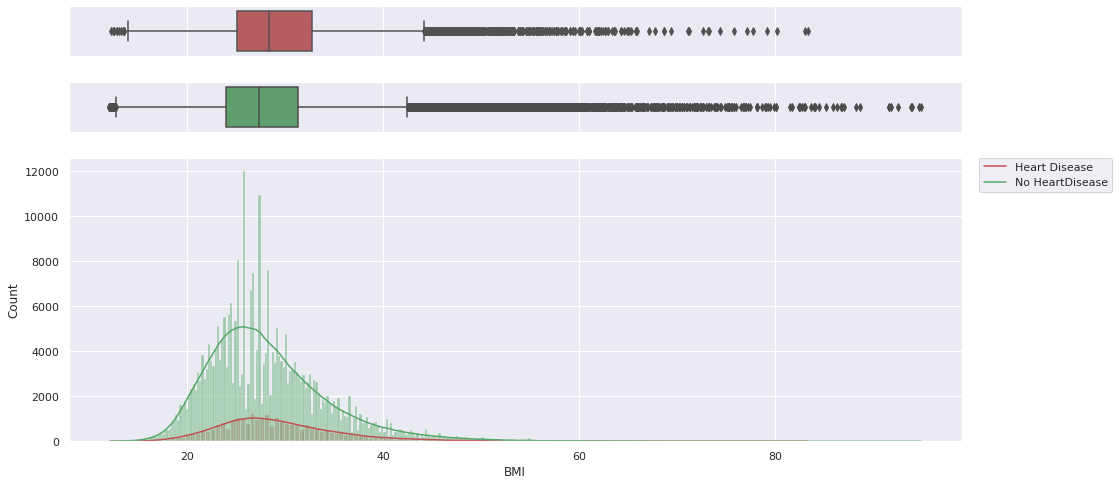

In [6]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})
 
# creating a figure composed of 3 matplotlib.Axes objects
f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})

# assigning a graph to each ax
sns.boxplot(x=df[df['HeartDisease']=='Yes']["BMI"], ax=ax_box1, color="r")
sns.histplot(df[df['HeartDisease']=='Yes'], x="BMI", ax=ax_hist, kde=True, color="r")

sns.boxplot(x=df[df['HeartDisease']=='No']["BMI"], ax=ax_box2, color='g')
sns.histplot(df[df['HeartDisease']=='No'], x="BMI", ax=ax_hist, kde=True, color='g')
 
# Remove x axis name for the boxplots
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

plt.legend(title='', loc=2, labels=['Heart Disease', 'No HeartDisease'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()

### Insights
- People with Heart Disease are found to have a higher BMI than people with no Heart Disease

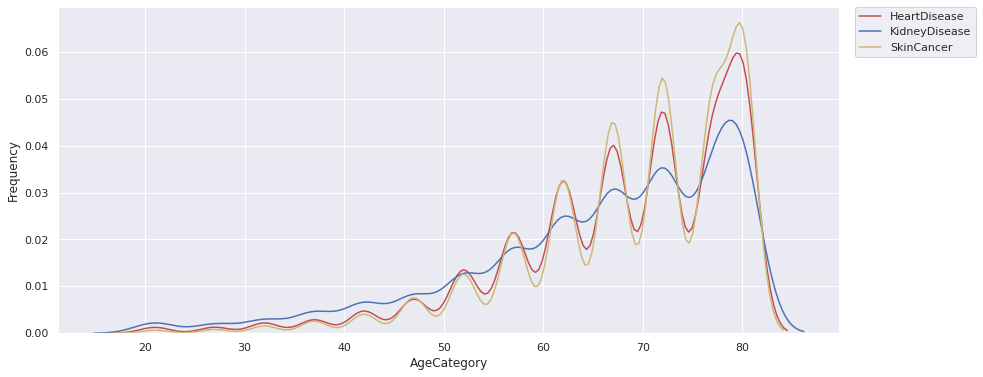

In [7]:
fig, ax = plt.subplots(figsize = (14,6))
sns.kdeplot(df[df["HeartDisease"]=='Yes']["AgeCategory"], alpha=1,shade = False, color="r", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["KidneyDisease"]=='Yes']["AgeCategory"], alpha=1,shade = False, color="b", label="KidneyDisease", ax = ax)
sns.kdeplot(df[df["SkinCancer"]=='Yes']["AgeCategory"], alpha=1,shade = False, color="y", label="SkinCancer", ax = ax)

ax.set_xlabel("AgeCategory")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

### Insights
- People found to have heart disease, skin cancer & kidney disease are mostly old people

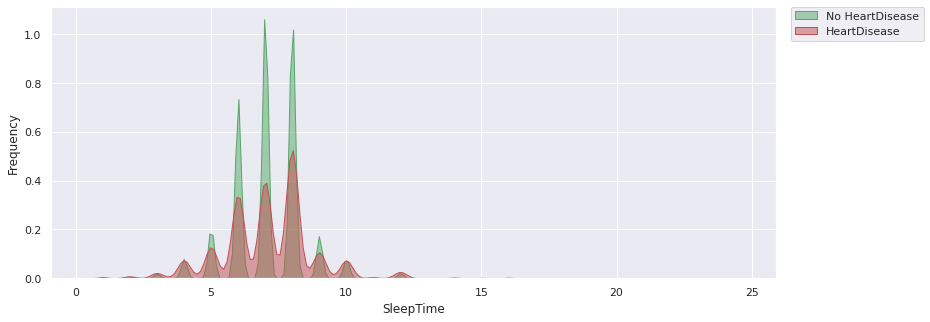

In [8]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]=='No']["SleepTime"], alpha=0.5,shade = True, color="g", label="No HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]=='Yes']["SleepTime"], alpha=0.5,shade = True, color="r", label="HeartDisease", ax = ax)
ax.set_xlabel("SleepTime")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

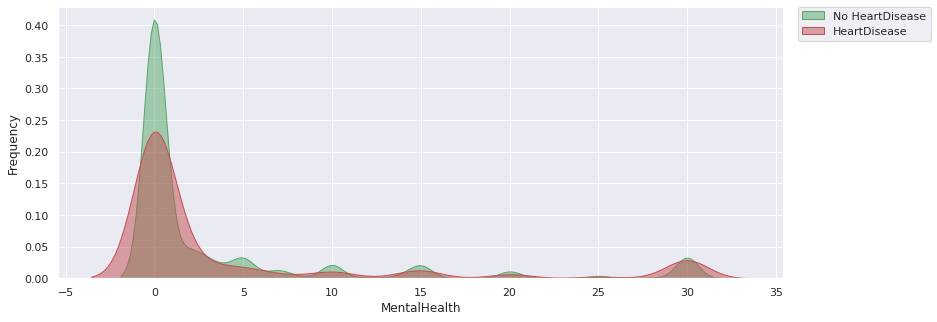

In [9]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]=='No']["MentalHealth"], alpha=0.5,shade = True, color="g", label="No HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]=='Yes']["MentalHealth"], alpha=0.5,shade = True, color="r", label="HeartDisease", ax = ax)
ax.set_xlabel("MentalHealth")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

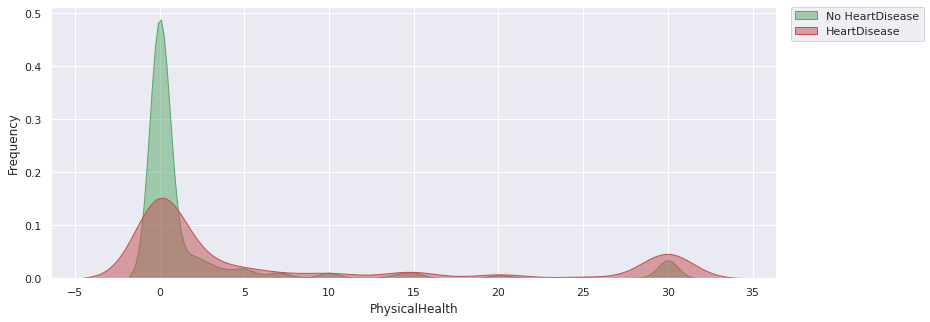

In [10]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]=='No']["PhysicalHealth"], alpha=0.5,shade = True, color="g", label="No HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]=='Yes']["PhysicalHealth"], alpha=0.5,shade = True, color="r", label="HeartDisease", ax = ax)
ax.set_xlabel("PhysicalHealth")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

<h2>3.2 <span style='color:#0386f7de'>|</span>Visualization of Categorical Data</h2>

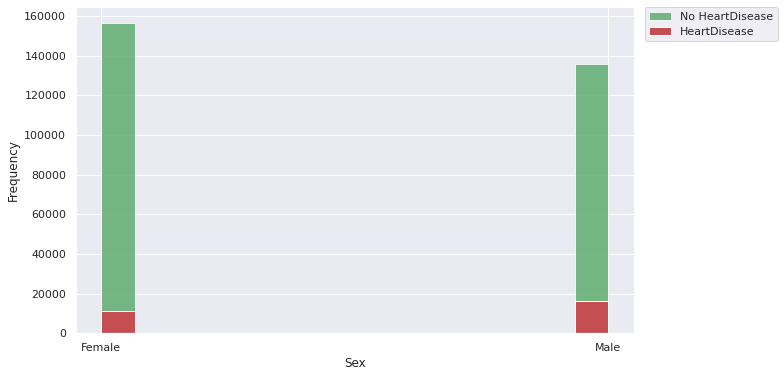

In [11]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HeartDisease"]=='No']["Sex"], bins=15, alpha=0.8, color="g", label="No HeartDisease")
ax.hist(df[df["HeartDisease"]=='Yes']["Sex"], bins=15, alpha=1, color="r", label="HeartDisease")

ax.set_xlabel("Sex")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

In [12]:
female_with_heart_disease = len(df[(df['HeartDisease']=='Yes') & (df['Sex']=='Female')])
num_female = len(df[df['Sex']=='Female'])
male_with_heart_disease = len(df[(df['HeartDisease']=='Yes') & (df['Sex']=='Male')])
num_male = len(df[df['Sex']=='Male'])
print('Probability of Male to have Heart disease:', male_with_heart_disease/num_male)
print('Probability of Female to have Heart disease:', female_with_heart_disease/num_female)

Probability of Male to have Heart disease: 0.10618461740904007
Probability of Female to have Heart disease: 0.06694675367241738


### Insights
- Most heart disease patients are Male than Females
- More Females were tested than males
- Males are approximately 1.6 times more likely to have heart disease than females

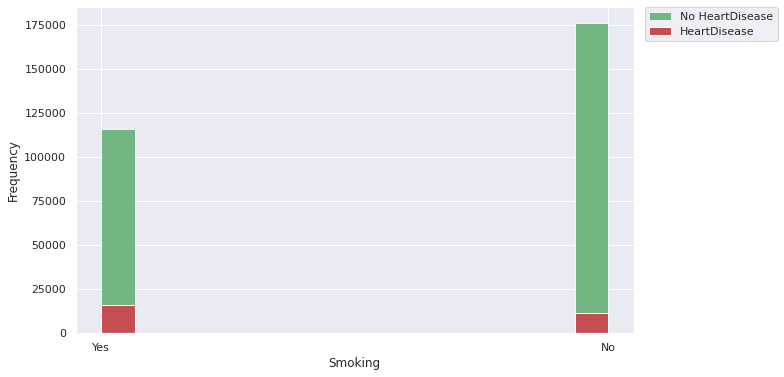

In [13]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HeartDisease"]=='No']["Smoking"], bins=15, alpha=0.8, color="g", label="No HeartDisease")
ax.hist(df[df["HeartDisease"]=='Yes']["Smoking"], bins=15, alpha=1, color="r", label="HeartDisease")

ax.set_xlabel("Smoking")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

In [14]:
smoke_and_heart_disease = len(df[(df['HeartDisease']=='Yes') & (df['Smoking']=='Yes')])
num_smoke = len(df[df['Smoking']=='Yes'])
no_smoke_and_heart_disease = len(df[(df['HeartDisease']=='Yes') & (df['Smoking']=='No')])
num_no_smoke = len(df[df['Smoking']=='No'])
print('Probability of Heart disease if you smoke:', smoke_and_heart_disease/num_smoke)
print("Probability of Heart disease if you don't smoke:", no_smoke_and_heart_disease/num_no_smoke)

Probability of Heart disease if you smoke: 0.12157715983867544
Probability of Heart disease if you don't smoke: 0.0603341370078824


### Insights
- Most heart disease patients smoke
- People who smoke are approximately twice as likely to have heart disease than people who don't smoke

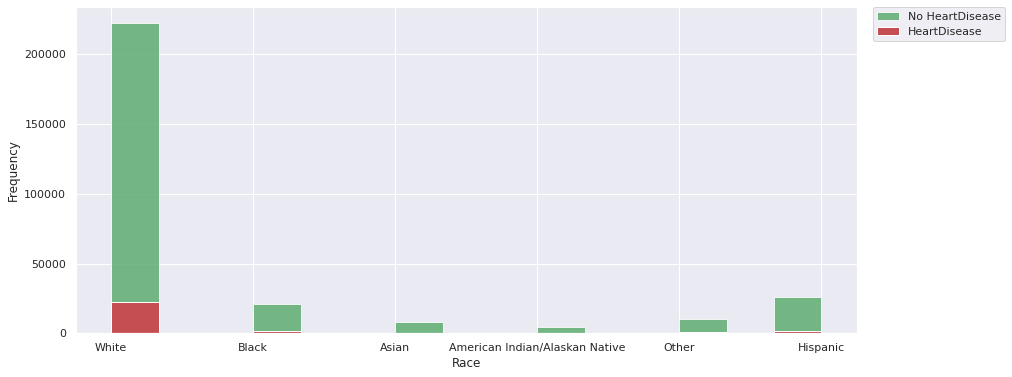

In [15]:
fig, ax = plt.subplots(figsize = (14,6))

ax.hist(df[df["HeartDisease"]=='No']["Race"], bins=15, alpha=0.8, color="g", label="No HeartDisease")
ax.hist(df[df["HeartDisease"]=='Yes']["Race"], bins=15, alpha=1, color="r", label="HeartDisease")

ax.set_xlabel("Race")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

### Insights
- Most Heart Disease Patients are White people

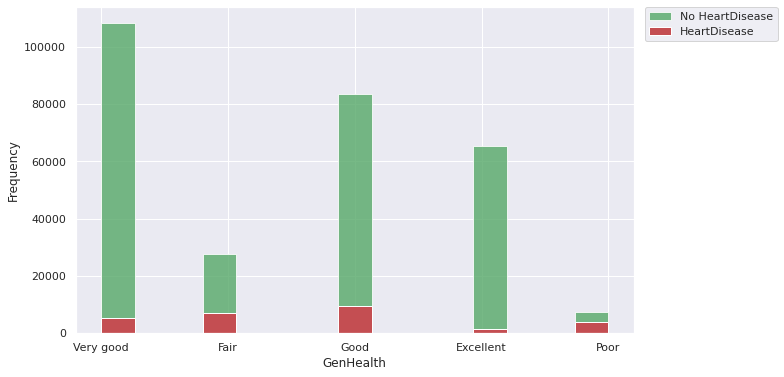

In [16]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HeartDisease"]=='No']["GenHealth"], bins=15, alpha=0.8, color="g", label="No HeartDisease")
ax.hist(df[df["HeartDisease"]=='Yes']["GenHealth"], bins=15, alpha=1, color="r", label="HeartDisease")

ax.set_xlabel("GenHealth")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

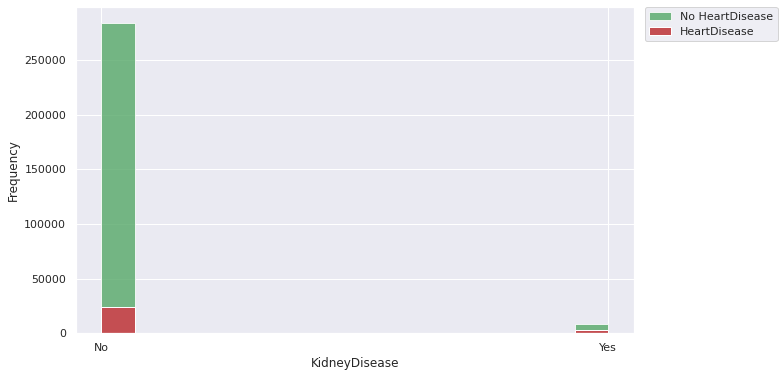

In [17]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HeartDisease"]=='No']["KidneyDisease"], bins=15, alpha=0.8, color="g", label="No HeartDisease")
ax.hist(df[df["HeartDisease"]=='Yes']["KidneyDisease"], bins=15, alpha=1, color="r", label="HeartDisease")

ax.set_xlabel("KidneyDisease")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

### Insights
- Most of the people tested have no kidney disease

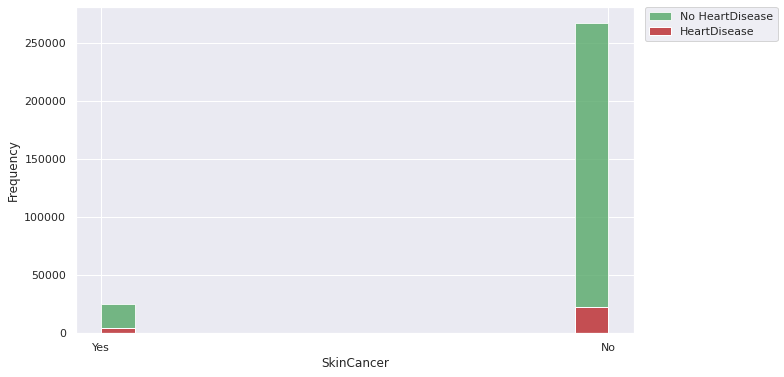

In [18]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HeartDisease"]=='No']["SkinCancer"], bins=15, alpha=0.8, color="g", label="No HeartDisease")
ax.hist(df[df["HeartDisease"]=='Yes']["SkinCancer"], bins=15, alpha=1, color="r", label="HeartDisease")

ax.set_xlabel("SkinCancer")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

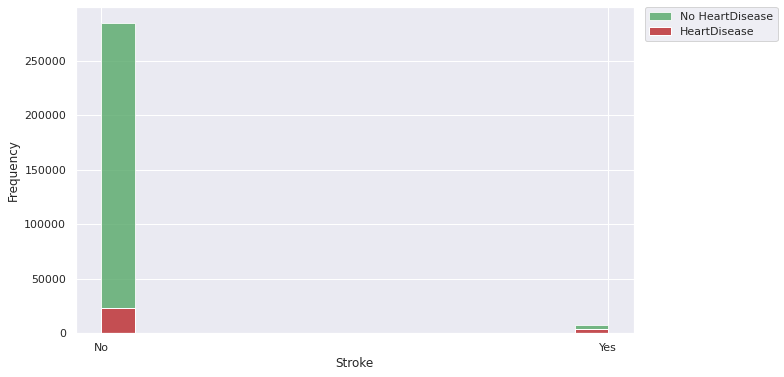

In [19]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HeartDisease"]=='No']["Stroke"], bins=15, alpha=0.8, color="g", label="No HeartDisease")
ax.hist(df[df["HeartDisease"]=='Yes']["Stroke"], bins=15, alpha=1, color="r", label="HeartDisease")

ax.set_xlabel("Stroke")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

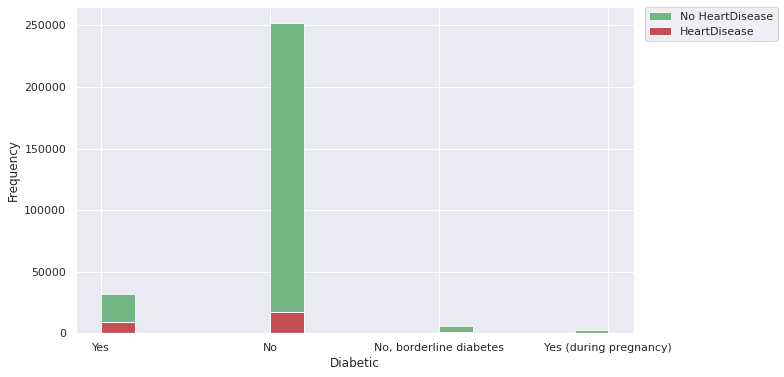

In [20]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HeartDisease"]=='No']["Diabetic"], bins=15, alpha=0.8, color="g", label="No HeartDisease")
ax.hist(df[df["HeartDisease"]=='Yes']["Diabetic"], bins=15, alpha=1, color="r", label="HeartDisease")

ax.set_xlabel("Diabetic")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

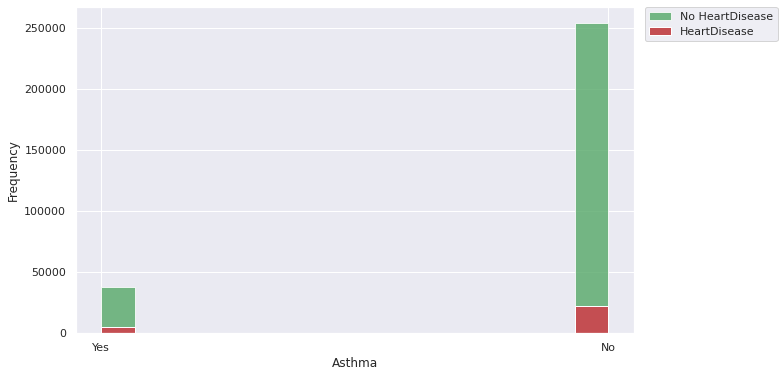

In [21]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HeartDisease"]=='No']["Asthma"], bins=15, alpha=0.8, color="g", label="No HeartDisease")
ax.hist(df[df["HeartDisease"]=='Yes']["Asthma"], bins=15, alpha=1, color="r", label="HeartDisease")

ax.set_xlabel("Asthma")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

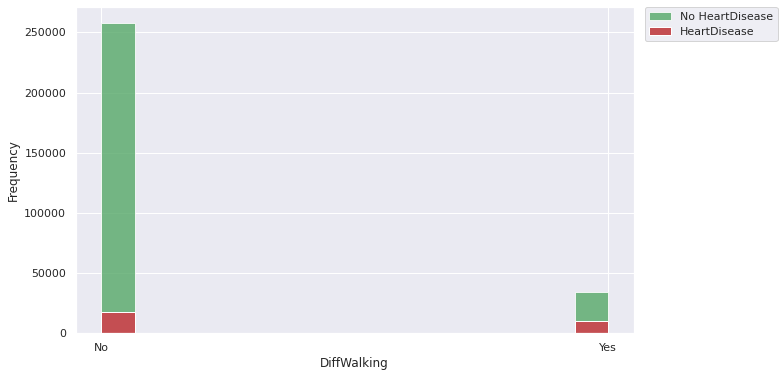

In [22]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HeartDisease"]=='No']["DiffWalking"], bins=15, alpha=0.8, color="g", label="No HeartDisease")
ax.hist(df[df["HeartDisease"]=='Yes']["DiffWalking"], bins=15, alpha=1, color="r", label="HeartDisease")

ax.set_xlabel("DiffWalking")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

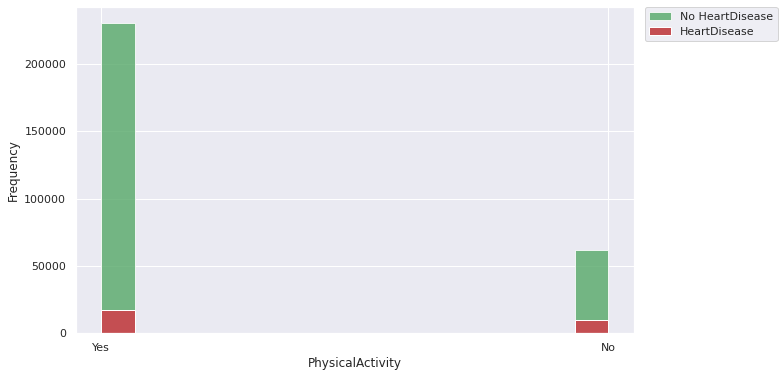

In [23]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HeartDisease"]=='No']["PhysicalActivity"], bins=15, alpha=0.8, color="g", label="No HeartDisease")
ax.hist(df[df["HeartDisease"]=='Yes']["PhysicalActivity"], bins=15, alpha=1, color="r", label="HeartDisease")

ax.set_xlabel("PhysicalActivity")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

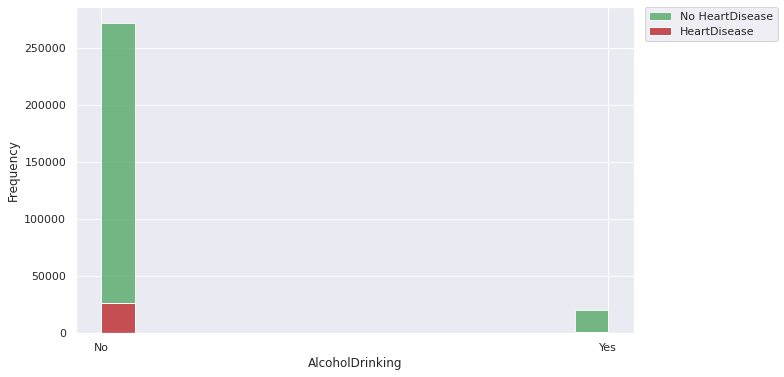

In [24]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HeartDisease"]=='No']["AlcoholDrinking"], bins=15, alpha=0.8, color="g", label="No HeartDisease")
ax.hist(df[df["HeartDisease"]=='Yes']["AlcoholDrinking"], bins=15, alpha=1, color="r", label="HeartDisease")

ax.set_xlabel("AlcoholDrinking")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

# <b>3 <span style='color:#0386f7de'>|</span>Data Cleaning</b>

In [25]:
encode_GenHealth = {'Very good':4, 'Fair':2, 'Good':3, 'Poor':1, 'Excellent':5}
df['GenHealth'] = df['GenHealth'].apply(lambda x: encode_GenHealth[x])

for col in df.columns:
        if df[col].dtype == 'O':
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])

# <b>4 <span style='color:#0386f7de'>|</span>Correlation of features</b>

<h2>4.1 <span style='color:#0386f7de'>|</span>Correlation Matrix</h2>

In [26]:
fig = px.imshow(df.corr(),color_continuous_scale="Blues")
fig.update_layout(height=750)
fig.show()

<h2>4.2 <span style='color:#0386f7de'>|</span> Distribution of Correlation of features</h2>

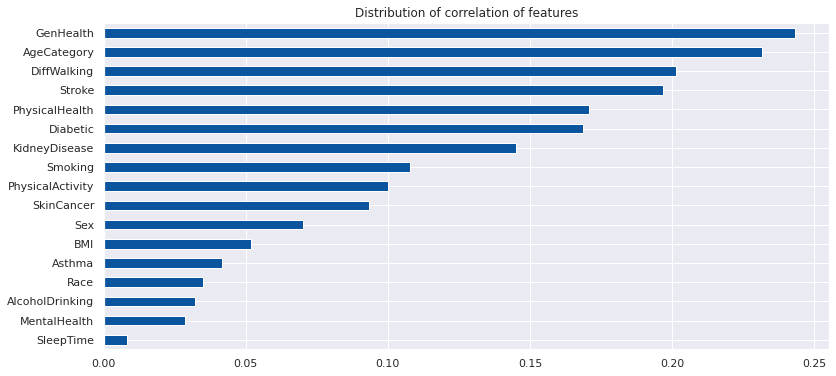

In [27]:
sns.set_style('darkgrid')
sns.set_palette('Blues_r')
plt.figure(figsize = (13,6))
plt.title('Distribution of correlation of features')
abs(df.corr()['HeartDisease']).sort_values()[:-1].plot.barh()
plt.show()